## MNIST Handwritten Digit Classifier

#### Overview
This project involves building a deep learning model from scratch to classify handwritten digits from the MNIST dataset.

### 1. Loading Datasets and Preprocessng

In [1]:
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt

# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
data, y = np.array(mnist.data, dtype='float32'), np.array(mnist.target, dtype='int')

# Reshape the data into 28x28 images
print(f"Dimension of data: {data.shape}")
# data = data.reshape(-1, 28, 28)
data = data.reshape(-1, 784,1)
print(f"Dimension of data: {data.shape}")

# Split the data into training and testing sets
num_train = 60000
X_train, X_test = data[:num_train], data[num_train:]
y_train, y_test = y[:num_train], y[num_train:]

# Normalize the data
div = X_test.max()
X_test = X_test / div
X_train = X_train / div

Dimension of data: (70000, 784)
Dimension of data: (70000, 784, 1)


### 2. All function Definitions

In [2]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    return sigmoid(z) * (1 - sigmoid(z))

def predict(W1, b1, W2, b2, X):
    # Forward Propagation
    Z1 = np.dot(W1, X) + b1
    A1 = sigmoid(Z1)

    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)

    predicted_class = np.argmax(A2)

    return predicted_class

def calculate_accuracy(W1, b1, W2, b2, X, y):
    correct_predictions = 0

    for i in range(len(X)):
        # Predict the class for each example
        prediction = predict(W1, b1, W2, b2, X[i])

        # Check if the prediction is correct
        if prediction == y[i]:
            correct_predictions += 1

    accuracy = correct_predictions / len(X)
    return accuracy

### 3. Train the model Definition

In [5]:
import numpy as np
from tqdm import tqdm
import time

# Initialize the weights and biases
W1 = np.random.randn(128, 784) * 0.01
W2 = np.random.randn(10, 128) * 0.01
b1 = np.zeros((128, 1))
b2 = np.zeros((10, 1))

# Define the training function
def Train(epoch, X_train, y_train, W1, W2,b1,b2, learning_rate, X_test, y_test):
    # Measuring the time taken by the model to train
    StartTime=time.time()
    for i in range(epoch):
        cost = 0
        for j in tqdm(range(len(X_train)), desc=f'Epoch {i+1} training '):
            X = X_train[j]
            Z1 = np.dot(W1, X) + b1  # (16, 784) * (784, 1) + (16, 1) = (16, 1)
            A1 = sigmoid(Z1)
            Z2 = np.dot(W2, A1) + b2  # (10, 16) * (16, 1) + (10, 1) = (10, 1)
            A2 = sigmoid(Z2)

            y_true = np.zeros((10, 1))
            y_true[y_train[j]] = 1

            d4_ = -2 * (y_true - A2) * sigmoid_derivative(Z2)
            d4 = np.dot(d4_, A1.T)
            W2 -= learning_rate * d4
            b2 -= learning_rate * d4_

            d3_ = np.dot(W2.T, d4_) * sigmoid_derivative(Z1)
            d3 = np.dot(d3_, X.T)
            W1 -= learning_rate * d3
            b1 -= learning_rate * d3_

            cost += np.sum((y_true - A2) ** 2)
        accuracy = calculate_accuracy(W1, b1, W2, b2, X_test, y_test)
        print(f"Epoch {i + 1}: Cost = {cost:.2f}, Accuracy = {accuracy * 100:.2f}%")
        Endtime = time.time()
        print('Total Training Time taken: ',round((Endtime-StartTime)/60),'Minutes')
    return W1, b1, W2, b2

# Assuming calculate_accuracy is defined elsewhere
# Example usage (you need to define X_train, y_train, W1, W2, learning_rate, X_test, and y_test):
# W1, b1, W2, b2 = Train(10, X_train, y_train, W1, W2, learning_rate, X_test, y_test)

### 4. Model training

In [6]:
# Train the model
learning_rate = 0.01
W1, b1, W2, b2 = Train(10, X_train, y_train, W1, W2,b1,b2, learning_rate, X_test, y_test)
np.savez('trained_weights.npz', W1=W1, b1=b1, W2=W2, b2=b2)

Epoch 1 training : 100%|██████████| 60000/60000 [00:12<00:00, 4667.69it/s]


Epoch 1: Cost = 25841.34, Accuracy = 89.24%
Total Training Time taken:  0 Minutes


Epoch 2 training : 100%|██████████| 60000/60000 [00:13<00:00, 4516.69it/s]


Epoch 2: Cost = 9997.32, Accuracy = 91.75%
Total Training Time taken:  0 Minutes


Epoch 3 training : 100%|██████████| 60000/60000 [00:12<00:00, 4647.59it/s]


Epoch 3: Cost = 8124.16, Accuracy = 92.76%
Total Training Time taken:  1 Minutes


Epoch 4 training : 100%|██████████| 60000/60000 [00:13<00:00, 4462.66it/s]


Epoch 4: Cost = 7095.53, Accuracy = 93.60%
Total Training Time taken:  1 Minutes


Epoch 5 training : 100%|██████████| 60000/60000 [00:13<00:00, 4347.96it/s]


Epoch 5: Cost = 6356.41, Accuracy = 94.11%
Total Training Time taken:  1 Minutes


Epoch 6 training : 100%|██████████| 60000/60000 [00:13<00:00, 4347.86it/s]


Epoch 6: Cost = 5773.03, Accuracy = 94.60%
Total Training Time taken:  1 Minutes


Epoch 7 training : 100%|██████████| 60000/60000 [00:14<00:00, 4277.86it/s]


Epoch 7: Cost = 5295.19, Accuracy = 95.14%
Total Training Time taken:  2 Minutes


Epoch 8 training : 100%|██████████| 60000/60000 [00:13<00:00, 4348.26it/s]


Epoch 8: Cost = 4895.98, Accuracy = 95.53%
Total Training Time taken:  2 Minutes


Epoch 9 training : 100%|██████████| 60000/60000 [00:14<00:00, 4226.60it/s]


Epoch 9: Cost = 4559.02, Accuracy = 95.80%
Total Training Time taken:  2 Minutes


Epoch 10 training : 100%|██████████| 60000/60000 [00:13<00:00, 4562.65it/s]


Epoch 10: Cost = 4271.51, Accuracy = 96.04%
Total Training Time taken:  2 Minutes


### 5. Model Evaluation and Confusion Matrix

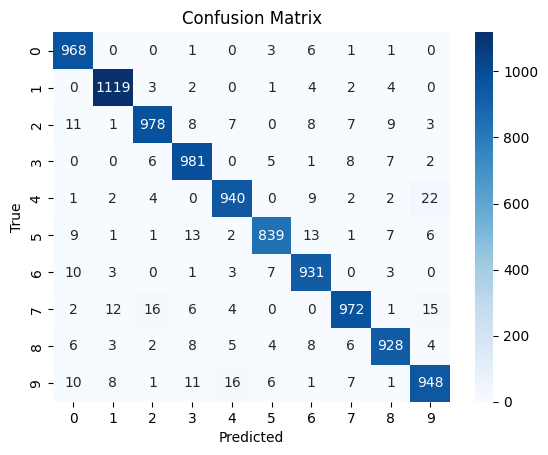

In [7]:
y_predicted = []
for i in range(len(X_test)):
    y_predicted.append(predict(W1, b1, W2, b2, X_test[i]))

from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming you have the variables y_true and y_predicted

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_predicted)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


True label: 4
Predicted class: 4


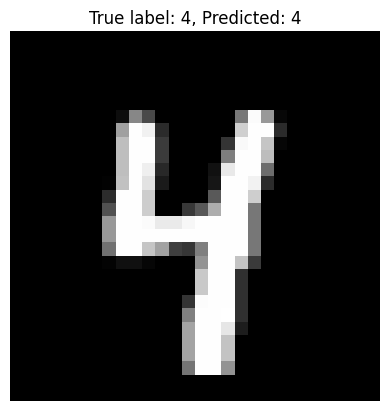

In [13]:
import random

# Select a random index from the test dataset
random_index = random.randint(0, len(X_test) - 1)

# Get the corresponding image and true label
random_image = X_test[random_index]
true_label = y_test[random_index]

# Predict the class for the random image
predicted_class = predict(W1, b1, W2, b2, random_image)

print(f"True label: {true_label}")
print(f"Predicted class: {predicted_class}")

# Display the image
plt.imshow(random_image.reshape(28, 28), cmap='gray')
plt.title(f"True label: {true_label}, Predicted: {predicted_class}")
plt.axis('off')
plt.show()